# WeRateDogs Twitter dataset Analysis

## Gather

Gathering data for the Twitter Dog Rating analysis from 3 sources

### Import libraries
import numpy as np
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
% matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
% matplotlib inline
import json

1) Gather the manually downloaded WeRateDogs Twitter Archive 'twitter-archive-enhanced.csv'

In [2]:
# create a dataframe and save the data from the WeRateDogs Twitter Archive into it
archived = pd.read_csv('twitter-archive-enhanced.csv')
archived.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2) Gather the image tweet predictions data 'image-predictions.tsv' from Udacity's server by downloading it using requests library and saving it in this workspace

In [3]:
# access the url, get the response and check if response is received successfully
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
print (response)   # If response is 200, then it is a success

<Response [200]>


In [4]:
# Open the file and write it into this project's workspace
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3) Query Twitter API for each tweet's JSON data using the Python's Tweepy library and storing every tweet's entire set of JSON data in a file called tweet_json.txt file

Each tweet's tweet ID, retweet count and favorite ("like") count at minimum is to be gathered

I am accessing project data without Twitter account and hence the below code has been taken from the material given by Udacity.

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archived.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 7597

Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167: 722613351520608256
Fail
1168:

Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442:

Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717:

Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

The tweet access failed due to 'Invalid or expired token'. Hence, accessing the tweet_json.txt file by using the link given by Udacity through requests library.

In [6]:
# Access the URL and get the response for the tweet JSON file
url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
response = requests.get(url)
print (response)   # If response is 200, then it is a success

<Response [200]>


In [7]:
# Open the file and write it into this project's workspace as tweet-json.txt
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [8]:
# Read the JSON file line by line to extract the tweet ID, retweet count and favorite count
df_list = []

with open("tweet-json.txt") as file:
    #val = json.obj(''.join(file.readlines()))
    for line in file:
        new_val = json.loads(line)
        #print(type(new_val))
        Id = new_val['id']
        retweet_count = new_val['retweet_count']
        fav_count = new_val['favorite_count']
        
        df_list.append({'id': Id, 'retweet_count': retweet_count, 'favorite_count': fav_count})
        
        
    tweets = pd.DataFrame(df_list, columns = ['id','retweet_count','favorite_count']) 
tweets

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assess

In [9]:
# explore the 'twitter-archive-enhanced.csv' 
archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
archived[archived.puppo != 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,None,None,None,puppo
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
398,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo


In [13]:
# possible values in the rating_numerator column
archived.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
archived[archived.rating_numerator >1000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [14]:
# possible values in the rating_denominator column
archived.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
# unique tweet ids in the  table
archived.tweet_id.nunique()

2356

In [16]:
archived.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
an                7
Daisy             7
Toby              7
Buddy             7
Bailey            7
Scout             6
Koda              6
Leo               6
Bella             6
Dave              6
Jack              6
Jax               6
Rusty             6
Stanley           6
Milo              6
Oscar             6
Sunny             5
               ... 
Ole               1
Jiminus           1
Milky             1
Mojo              1
Berkeley          1
Dallas            1
Kaia              1
Shikha            1
Strudel           1
Tess              1
Asher             1
Tuck              1
Monster           1
Anna              1
Theo              1
Gerbald           1
Sky               1
Donny             1
Ace               1


In [17]:
archived.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
archived.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [19]:
archived.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [20]:
archived.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [21]:
archived[archived.expanded_urls.isnull()].count()

tweet_id                      59
in_reply_to_status_id         55
in_reply_to_user_id           55
timestamp                     59
source                        59
text                          59
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                  0
rating_numerator              59
rating_denominator            59
name                          59
doggo                         59
floofer                       59
pupper                        59
puppo                         59
dtype: int64

In [22]:
archived.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [23]:
archived.expanded_urls[6]

'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1'

In [24]:
archived.expanded_urls[32]

'https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873'

In [25]:
archived.expanded_urls[746]

'https://vine.co/v/5nzYBpl0TY2'

There are 59 tweet IDs without images i.e., no value in the 'expanded_urls' column <br>
Mismatch in the tweet_id and tweet ID in the expanded_urls after the '\status\' is also an anomaly  

In [26]:
archived.retweeted_status_timestamp.value_counts()

2016-03-20 23:23:54 +0000    1
2016-01-27 18:42:06 +0000    1
2017-01-07 20:18:46 +0000    1
2016-03-21 19:29:52 +0000    1
2017-03-04 00:21:08 +0000    1
2017-01-11 02:21:57 +0000    1
2017-02-02 01:01:21 +0000    1
2017-05-02 00:04:57 +0000    1
2016-11-19 19:55:41 +0000    1
2016-06-10 00:39:48 +0000    1
2016-07-12 18:27:35 +0000    1
2016-11-22 00:10:52 +0000    1
2016-10-04 15:55:06 +0000    1
2016-04-29 00:21:01 +0000    1
2016-05-28 03:04:00 +0000    1
2016-01-13 16:56:30 +0000    1
2016-10-23 00:27:05 +0000    1
2016-11-09 00:37:46 +0000    1
2016-03-07 18:09:06 +0000    1
2016-11-02 23:45:19 +0000    1
2016-04-09 02:47:55 +0000    1
2016-06-05 19:47:03 +0000    1
2016-03-24 01:11:29 +0000    1
2016-02-21 01:19:47 +0000    1
2015-12-16 01:27:03 +0000    1
2016-09-19 01:42:24 +0000    1
2016-03-09 16:56:11 +0000    1
2016-07-13 23:48:51 +0000    1
2016-10-12 15:55:59 +0000    1
2016-10-23 19:42:02 +0000    1
                            ..
2017-03-07 00:15:46 +0000    1
2015-12-

In [27]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [28]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [30]:
images[images.p1 == 'piggy_bank']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.17632,False,hair_spray,0.097487,False,toy_poodle,0.086502,True


In [31]:
# check if image number has value greater than 4
images[images.img_num > 4]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [32]:
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [33]:
images.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [34]:
images.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
malinois                           20
chow                               20
toy_terrier                        20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [35]:
# check for duplicated tweet id in images table
images[images.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [36]:
# no duplicate tweet id seen in images dataframe

In [37]:
# assessing the `tweets` dataframe
tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [38]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [39]:
# check for duplicated tweet id in tweets table
tweets[tweets.id.duplicated()]

,id,retweet_count,favorite_count


In [40]:
# check the tweet with highest retweet_count
tweets.retweet_count.max()

79515

In [41]:
# find the id of the tweet with highest retweet_count
tweets[tweets.retweet_count == 79515]

,id,retweet_count,favorite_count
1037,744234799360020481,79515,131075


In [42]:
# find the id of the tweet with highest retweet_count 
archived[archived.tweet_id == 744234799360020481]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None


In [43]:
# check the tweet with highest favorite_count
tweets.favorite_count.max()

132810

In [44]:
# find the id of the tweet with highest favorite_count
tweets[tweets.favorite_count == 132810]

,id,retweet_count,favorite_count
412,822872901745569793,48265,132810


In [45]:
# assess the archived details of the tweet with highest favorite_count
archived[archived.tweet_id == 822872901745569793]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
413,822872901745569793,NaN,NaN,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,13,10,None,None,None,None,puppo


In [46]:
# check for the repeating column names in 3 tables
headers = pd.Series(list(archived)+list(images)+list(tweets))
headers[headers.duplicated()]

17    tweet_id
dtype: object

### Issues Identified:

In the 'twitter-archive-enhanced.csv' based 'archived' table, it is seen that there are 2356 tweet details and 17 columns. <br>
In the 'image-predictions.tsv' based 'images' table, it is seen that there are 2075 rows and 12 columns.<br>
In the Twitter API based 'tweets' there are 2354 rows and 3 columns.<br>

#### Quality Issues:

In 'archived' table, <br>
1) Column 'timestamp' and 'retweeted_status_timestamp' are of type 'object', instead of being datetime <br>
2) Column 'rating_numerator' has a maximum value of 1776, which seems to be an anomaly. Any numerator value greater than 1000 can be considered as abnormal <br>
3) Column 'rating_denominator' has 23 count of values that are not 10. There is one value with denominator 0 which is a clear case of anomaly <br>
4) Tweet ids without expanded_urls values <br>
5) Expanded_urls should include the tweet_id after the keyword 'status\' <br>
6) There are retweet ratings <br>
7) In columns: doggo, floofer, pupper and puppo, Nulls represented as 'None'<br>

In tweets table,<br>
8) Column name of Tweet IDs is 'id' <br>


#### Tidy Issues:

1) 'retweet_count' and 'favorite_count' columns should be a part of archived table <br>
2) In the 'images' table, the prediction of algorithms: p1,p2 and p3 are given as column names, instead of values. Similarly, the confidence level of algorithm's prediction: p1_conf, p2_conf and p3_conf are given as column names instead of values. Also, prediction correctness p1_dog, p2_dog and p3_dog are given as column names instead of values.<br>


## Clean

In [47]:
# create a copy of the 3 tables
archived_clean = archived.copy()
images_clean = images.copy()
tweets_clean = tweets.copy()

#### Quality Issue 1: Errorneous Datatype: column 'timestamp' and 'retweeted_status_timestamp'. 

##### Define
Convert 'timestamp' and 'retweeted_status_timestamp' datatype to datetime.<br>

##### Code

In [48]:
archived_clean.timestamp = pd.to_datetime(archived_clean.timestamp)
archived_clean.retweeted_status_timestamp = pd.to_datetime(archived_clean.retweeted_status_timestamp)

##### Test

In [49]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

#### Quality Issue 2: Column 'rating_numerator' has a maximum value of 1776, which seems to be an anomaly. Any numerator value greater than 1000 can be considered as abnormal

##### Define
Convert the numerator >1000 to a value 1000

##### Code

In [50]:
archived_clean[archived_clean.rating_numerator >1000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [51]:
archived_clean.rating_numerator = archived_clean.rating_numerator.replace(1776,1000)

##### Test

In [52]:
# Check if numerator value > 1000 exists
archived_clean[archived_clean.rating_numerator >1000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [53]:
# Check if numerator value 1776 is replaced by 1000
archived_clean[archived_clean.tweet_id == 749981277374128128]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/749981277...,1000,10,Atticus,None,None,None,None


#### Quality Issue 3: Column 'rating_denominator' has 23 count of values that are not 10. There is one value with denominator 0 which is a clear case of anomaly

##### Define
Convert denominator with value 0 to 10.

##### Code

In [54]:
archived_clean[archived_clean.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,NaN,960,0,None,None,None,None,None


In [55]:
archived_clean.rating_denominator = archived_clean.rating_denominator.replace(0,10) 

##### Test

In [56]:
# Check if denominator 0 is reeplaced by 10
archived_clean[archived_clean.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [57]:
# Check to see that the new denomiator is 10
archived_clean[archived_clean.tweet_id == 835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,NaN,960,10,None,None,None,None,None


#### Quality Issue 4: Tweet ids without expanded_urls values

##### Define
Identify tweet IDs which does not have image URL in the column 'expanded_urls' and exclude it from the dataset

##### Code

In [58]:
# remove the tweet IDs with missing expanded_urls values
archived_clean = archived_clean[~(archived_clean.expanded_urls.isnull())]

##### Test

In [59]:
# check if any tweet ID with empty url value exists
archived_clean[archived_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [60]:
# check if total count of tweet ids in dataset has reduced by 59
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: datetime

#### Quality Issue 5: Expanded_urls should include the tweet_id at the end of the url after the last '\\'

##### Define
Identify tweets IDs which does not have tweet ID value in the image URL column 'expanded_urls' after the last 'status\' and exclude it from the dataset

##### Code 

In [61]:
archived_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [62]:
# apply regular expression to extract the tweet ID after /status/ from the 'expanded_urls' column 
archived_clean['url_tweetID'] = archived_clean.expanded_urls.str.extract('[A-Za-z/:_]+status/(\d+)[A-Za-z0-9/,]+',expand = True)

In [63]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
url_tweetID     

In [64]:
# There seems to be only 2190 non null object rows in url_tweetID column i.e., 107 rows with null values
archived_clean[archived_clean.url_tweetID.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_tweetID
310,835309094223372289,NaN,NaN,2017-02-25 02:03:02,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: So this just changed my life. 1...,7.530398e+17,4.196984e+09,2016-07-13 01:34:21,"https://vine.co/v/5W2Dg3XPX7a,https://vine.co/...",13,10,None,None,None,None,None,NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaT,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None,NaN
406,823719002937630720,NaN,NaN,2017-01-24 02:28:08,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Balto. He's very conten...,7.840579e+17,4.196984e+09,2016-10-06 15:49:14,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/...",12,10,Balto,None,None,None,None,NaN
444,819238181065359361,NaN,NaN,2017-01-11 17:42:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,NaN,NaN,NaT,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,None,None,pupper,None,NaN
450,818646164899774465,NaN,NaN,2017-01-10 02:30:30,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Seamus. He's very bad a...,8.083449e+17,4.196984e+09,2016-12-12 16:16:49,"https://vine.co/v/5QWd3LZqXxd,https://vine.co/...",11,10,Seamus,None,None,None,None,NaN
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,NaN,NaN,NaT,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None,NaN
546,805823200554876929,NaN,NaN,2016-12-05 17:16:37,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Reginald. He's one magi...,7.841832e+17,4.196984e+09,2016-10-07 00:06:50,"https://vine.co/v/5ghHLBMMdlV,https://vine.co/...",12,10,Reginald,None,None,None,puppo,NaN
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaT,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None,NaN
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,None,None,pupper,None,NaN
655,791784077045166082,NaN,NaN,2016-10-27 23:30:09,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what this dog is d...,6.820881e+17,4.196984e+09,2015-12-30 06:37:25,"https://vine.co/v/iqMjlxULzbn,https://vine.co/...",12,10,None,None,None,None,None,NaN


In [65]:
# remove the 107 null value rows 
archived_clean = archived_clean[~(archived_clean.url_tweetID.isnull())]

In [66]:
# then convert string to integer
archived_clean.url_tweetID = archived_clean.url_tweetID.astype(int)

In [67]:
# keep only the rows which have matching 'tweet_id' and 'url_tweetID' column values
archived_clean = archived_clean[archived_clean.tweet_id == archived_clean.url_tweetID]

##### Test

In [68]:
# check if all the rows have matching values
archived_clean[archived_clean.tweet_id == archived_clean.url_tweetID]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_tweetID
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,892420643555336193
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,892177421306343426
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,891815181378084864
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,891689557279858688
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,891327558926688256
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,891087950875897856
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,890971913173991426
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,890729181411237888
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,890609185150312448
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,890240255349198849


In [69]:
# check if the equality test results in True
(archived_clean.tweet_id == archived_clean.url_tweetID)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
31      True
        ... 
2326    True
2327    True
2328    True
2329    True
2330    True
2331    True
2332    True
2333    True
2334    True
2335    True
2336    True
2337    True
2338    True
2339    True
2340    True
2341    True
2342    True
2343    True
2344    True
2345    True
2346    True
2347    True
2348    True
2349    True
2350    True
2351    True
2352    True
2353    True
2354    True
2355    True
Length: 1994, dtype: bool

In [70]:
# create a mask containing only the tweet_ID and url_tweetID column to test its values
testdf = archived_clean[['tweet_id', 'url_tweetID']]
testdf

,tweet_id,url_tweetID
0,892420643555336193,892420643555336193
1,892177421306343426,892177421306343426
2,891815181378084864,891815181378084864
3,891689557279858688,891689557279858688
4,891327558926688256,891327558926688256
5,891087950875897856,891087950875897856
6,890971913173991426,890971913173991426
7,890729181411237888,890729181411237888
8,890609185150312448,890609185150312448
9,890240255349198849,890240255349198849


In [71]:
testdf.sample(5)

,tweet_id,url_tweetID
144,863907417377173506,863907417377173506
442,819588359383371776,819588359383371776
1272,709225125749587968,709225125749587968
296,837366284874571778,837366284874571778
1862,675432746517426176,675432746517426176


In [72]:
# drop 'url_tweetID' column which had the tweet ID  value extracted from the 'expanded_urls' column
archived_clean = archived_clean.drop('url_tweetID',axis=1)

In [73]:
archived_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Quality Issue 6: There seems to be retweet ratings

##### Define
Remove the retweet ratings, since we are interested only in the original tweets

##### Code

In [74]:
# check the retweets in the original archived table
archived[archived.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


There were 181 retweets in the original archived table

In [75]:
# Count of retweets in the archived_clean  table
archived_clean[archived_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


There are no retweets in the archived_clean table since all the retweets were removed when expanded_urls column was cleaned

##### Test

As per original 'archived' table, tweet_id 888202515573088257 had retweets.<br> So spot check if it is avaliable in the 'archived_clean' table has been removed

In [76]:
archived_clean[archived_clean.tweet_id == 888202515573088257]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Quality Issue 7: In columns: doggo, floofer, pupper and puppo, Nulls represented as 'None'

##### Define

 In columns: doggo, floofer, pupper and puppo, replace 'None' with 'Nan'

##### Code

In [77]:
archived_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [78]:
archived_clean.doggo = archived_clean.doggo.replace('None',np.nan)
archived_clean.floofer	 = archived_clean.floofer.replace('None',np.nan)
archived_clean.pupper = archived_clean.pupper.replace('None',np.nan)
archived_clean.puppo = archived_clean.puppo.replace('None',np.nan)

##### Test

In [79]:
archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [80]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         74 non-null object
floofer                       8 non-null object
pupper                        212 non-null object
puppo                         23 non-null object
dtypes: datetime64[ns](2), flo

It is seen now that column: doggo, floofer, pupper and puppo either relevant value or Nan value. So, 'None' has been replaced

#### Quality Issue 8: In `tweets` table, column name of Tweet IDs is 'id'

##### Define

Replace column name 'id' with 'tweet_id' in the `tweets` table

##### Code

In [81]:
tweets_clean = tweets_clean.rename(columns = {'id':'tweet_id'})

##### Test

In [82]:
tweets_clean.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


#### Tidy Issues 1: 'retweet_count' and 'favorite_count' columns should be a part of `archived` table

##### Define

Merge 'retweet_count' and 'favorite_count' columns from `tweets` table to `archived` table

##### Code

In [83]:
archived_clean = pd.merge(archived_clean,tweets_clean,on = ['tweet_id'],how='left')

##### Test

In [84]:
archived_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,9774,41048
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,NaN,NaN,NaN,3261,20562
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN,2158,12041
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,NaN,NaN,NaN,16716,56848
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN,4429,28226
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,7711,32467


#### Tidy Issues 2: In the `images` table, the prediction of algorithms: p1,p2 and p3 are given as column names, instead of values. Similarly, the confidence level of algorithm's prediction: p1_conf, p2_conf and p3_conf are given as column names instead of values. Also, prediction correctness p1_dog, p2_dog and p3_dog are given as column names instead of values.

##### Define

Melt *p1*, *p2* and *p3* into *Algorithm* and *dog_breed* column 

##### Code

In [85]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Convert p1_conf, p2_conf and p3_conf column datatype from float to string. Similarly, convert p1_dog, p2_dog and p3_dog column datatype boolean to string

In [86]:
# convert boolean to string
images_clean.p1_dog = images_clean.p1_dog.astype(str)
images_clean.p2_dog = images_clean.p2_dog.astype(str)
images_clean.p3_dog = images_clean.p3_dog.astype(str)

In [87]:
# convert float to string
images_clean.p1_conf = images_clean.p1_conf.astype(str)
images_clean.p2_conf = images_clean.p2_conf.astype(str)
images_clean.p3_conf = images_clean.p3_conf.astype(str)

In [88]:
# concatenate value of p1_conf into p1
images_clean.p1 = images_clean.p1.str.cat(images_clean.p1_conf,sep = '=')

In [89]:
# concatenate value of p1_dog into p1
images_clean.p1 = images_clean.p1.str.cat(images_clean.p1_dog,sep = '=')

In [90]:
# concatenate value of p2_conf into p2 and then p2_dog into p2
images_clean.p2 = images_clean.p2.str.cat(images_clean.p2_conf,sep = '=')
images_clean.p2 = images_clean.p2.str.cat(images_clean.p2_dog,sep = '=')

In [91]:
# concatenate value of p3_conf into p3 and then p3_dog into p3
images_clean.p3 = images_clean.p3.str.cat(images_clean.p3_conf,sep = '=')
images_clean.p3 = images_clean.p3.str.cat(images_clean.p3_dog,sep = '=')

In [92]:
# drop p1_conf, p1_dog, p2_conf, p2_dog, p3_conf and p3_dog
images_clean = images_clean.drop(['p1_conf','p2_conf','p3_conf','p1_dog','p2_dog', 'p3_dog'], axis = 1)

In [93]:
# Melt columns p1, p2 and p3 into `algorithm` and `dog_breed` to capture the algorithm name and the dog prediction details
images_clean = pd.melt(images_clean, id_vars = ['tweet_id','jpg_url','img_num'], var_name = 'algorithm',value_name = 'dog_breed')

In [94]:
#split the `dog_breed` column details into 3 different column values
images_clean['breed'],images_clean['confidence'],images_clean['prediction'] = images_clean['dog_breed'].str.split('=',2).str

In [95]:
# drop column `dog_breed`
images_clean = images_clean.drop('dog_breed',axis = 1)

In [96]:
# convert confidence column datatype from string to float
images_clean.confidence = images_clean.confidence.astype(float)

##### Test

In [97]:
images_clean

,tweet_id,jpg_url,img_num,algorithm,breed,confidence,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,0.560311,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,p1,Bernese_mountain_dog,0.651137,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,p1,box_turtle,0.933012,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,p1,chow,0.692517,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,p1,shopping_cart,0.962465,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,p1,miniature_poodle,0.201493,True


In [98]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id      6225 non-null int64
jpg_url       6225 non-null object
img_num       6225 non-null int64
algorithm     6225 non-null object
breed         6225 non-null object
confidence    6225 non-null float64
prediction    6225 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 340.5+ KB


In [99]:
images_clean.prediction.value_counts()

True     4584
False    1641
Name: prediction, dtype: int64

8 Quality issues and 2 tidiness issues have been assessed and cleaned.<br>

## Data Storing
Data is present in `archived_clean` and `images_clean` dataframe.<br>
Store the data in 2 CSV: `twitter_archive_master.csv` and `images.csv`.<br>
Store the data in `twitter_archive_database.db` database in table `master` and `image_pred`.<br>

In [100]:
# Save the `archived_clean` dataset in `twitter_archive_master.csv' as new file and `images_clean` in `image_predictions.csv` as new file
archived_clean.to_csv('twitter_archive_master.csv', index = False)
images_clean.to_csv('image_predictions.csv', index = False)

In [101]:
# Store the datasets in Database using SQLite
# import library
from sqlalchemy import create_engine

In [102]:
# create SQLAlchemy engine and an empty 'twitter_archive_database' database
engine = create_engine('sqlite:///twitter_archive_database.db')
engine

Engine(sqlite:///twitter_archive_database.db)

In [103]:
# store dataframe 'archived_clean' in a table called 'master' in  twitter_archive_database' database
archived_clean.to_sql('master',engine,index= False)

In [104]:
# store dataframe 'images_clean' in a table called 'image_pred' in  twitter_archive_database' database
images_clean.to_sql('image_pred',engine,index= False)

In [105]:
# check if the 'archived_clean' dataframe has been saved in database by reading it
df_gather = pd.read_sql('SELECT * FROM master', engine)
df_gather.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56.000000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467


In [106]:
# check if the 'images_clean' dataframe has been saved in database by reading it
df_image = pd.read_sql('SELECT * FROM image_pred', engine)
df_image.head(2)

,tweet_id,jpg_url,img_num,algorithm,breed,confidence,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True


## Data Analyze and Visualize

## Analysis 1

### Dog stage analysis:

When the tweets were made with dog having given a specific stage name: doggo, floofer, puppo or pupper, their rating were in a standard range between 3 to 27.

#### `Doggo` stage analysis

In [107]:
# create a mask containing only 'doggo' stage
archived_clean_doggo = archived_clean[archived_clean.doggo.notnull()]
archived_clean_doggo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,7711,32467
37,884162670584377345,NaN,NaN,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,NaN,NaN,NaN,3128,20771
81,872967104147763200,NaN,NaN,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,NaN,NaN,NaN,5669,28031
89,871515927908634625,NaN,NaN,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,NaN,NaN,NaN,3628,20730
98,869596645499047938,NaN,NaN,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,NaN,NaN,NaN,3327,16476
137,858843525470990336,NaN,NaN,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,NaN,NaN,NaN,3771,16304
148,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,NaN,NaN,puppo,19196,47844
154,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,NaN,NaN,3433,17169
185,846514051647705089,NaN,NaN,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,NaN,NaN,NaN,13076,48410
190,845397057150107648,NaN,NaN,2017-03-24 22:08:59,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaT,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo,NaN,NaN,NaN,2072,8241


In [108]:
# denominator rating range
archived_clean_doggo.rating_denominator.value_counts()

10    74
Name: rating_denominator, dtype: int64

In [109]:
# numerator rating range
archived_clean_doggo.rating_numerator.value_counts()

13    21
11    18
12    17
14     7
10     7
8      3
5      1
Name: rating_numerator, dtype: int64

In [110]:
# numerator rating mean
doggo_mean = archived_clean_doggo.rating_numerator.mean()
doggo_mean

11.783783783783784

#### `floofer` stage analysis

In [111]:
# create a mask containing only 'floofer' stage
archived_clean_floofer = archived_clean[archived_clean.floofer.notnull()]
archived_clean_floofer

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
40,883360690899218434,NaN,NaN,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,NaN,floofer,NaN,NaN,3825,22986
154,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,NaN,NaN,3433,17169
429,800388270626521089,NaN,NaN,2016-11-20 17:20:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,NaN,floofer,NaN,NaN,3265,12456
560,776218204058357768,NaN,NaN,2016-09-15 00:36:55,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/776218204...,13,10,None,NaN,floofer,NaN,NaN,18497,33345
731,749317047558017024,NaN,NaN,2016-07-02 19:01:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,NaN,floofer,NaN,NaN,2509,6076
821,737445876994609152,NaN,NaN,2016-05-31 00:49:32,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/737445876...,13,10,None,NaN,floofer,NaN,NaN,5048,11302
838,733822306246479872,NaN,NaN,2016-05-21 00:50:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,NaN,floofer,NaN,NaN,1141,4015
1285,685307451701334016,NaN,NaN,2016-01-08 03:50:03,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,NaN,floofer,NaN,NaN,496,2262


In [112]:
# denominator rating range
archived_clean_floofer.rating_denominator.value_counts()

10    8
Name: rating_denominator, dtype: int64

In [113]:
# numerator rating range
archived_clean_floofer.rating_numerator.value_counts()

13    3
12    2
11    2
10    1
Name: rating_numerator, dtype: int64

In [114]:
# numerator rating mean
floofer_mean = archived_clean_floofer.rating_numerator.mean()
floofer_mean

11.875

#### `pupper` stage analysis

In [115]:
# create a mask containing only 'pupper' stage
archived_clean_pupper = archived_clean[archived_clean.pupper.notnull()]
archived_clean_pupper

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
28,886366144734445568,NaN,NaN,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,NaN,NaN,pupper,NaN,3316,21524
43,882762694511734784,NaN,NaN,2017-07-06 00:46:41,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,NaN,NaN,pupper,NaN,5134,28903
49,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN,16570,50199
69,876838120628539392,NaN,NaN,2017-06-19 16:24:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,NaN,NaN,pupper,NaN,3506,21125
76,874296783580663808,NaN,NaN,2017-06-12 16:06:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,NaN,NaN,pupper,NaN,4308,26651
80,873213775632977920,NaN,NaN,2017-06-09 16:22:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaT,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,NaN,NaN,pupper,NaN,1667,7467
88,871762521631449091,NaN,NaN,2017-06-05 16:15:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/871762521...,12,10,Rover,NaN,NaN,pupper,NaN,3678,20787
108,866450705531457537,NaN,NaN,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,NaN,NaN,pupper,NaN,32883,106827
153,854120357044912130,NaN,NaN,2017-04-17 23:52:16,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/854120357...,14,10,None,NaN,NaN,pupper,NaN,8285,33911
170,850019790995546112,NaN,NaN,2017-04-06 16:18:05,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,NaN,NaN,pupper,NaN,5459,21944


In [116]:
# denominator rating range
archived_clean_pupper.rating_denominator.value_counts()

10    212
Name: rating_denominator, dtype: int64

In [117]:
# numerator rating range
archived_clean_pupper.rating_numerator.value_counts()

12    52
11    51
10    48
9     16
13    13
8     12
7      8
14     7
5      2
27     1
6      1
3      1
Name: rating_numerator, dtype: int64

In [118]:
# numerator rating mean
pupper_mean = archived_clean_pupper.rating_numerator.mean()
pupper_mean

10.726415094339623

#### `puppo` stage analysis

In [119]:
# create a mask containing only 'puppo' stage
archived_clean_puppo = archived_clean[archived_clean.puppo.notnull()]
archived_clean_puppo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889665388...,13,10,None,NaN,NaN,NaN,puppo,8538,38818
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,NaN,NaN,NaN,puppo,2321,15359
62,878776093423087618,NaN,NaN,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,NaN,NaN,NaN,puppo,4319,19763
78,874012996292530176,NaN,NaN,2017-06-11 21:18:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,NaN,NaN,NaN,puppo,11007,35501
105,867421006826221569,NaN,NaN,2017-05-24 16:44:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,NaN,NaN,NaN,puppo,2697,16755
134,859607811541651456,NaN,NaN,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/859607811...,13,10,None,NaN,NaN,NaN,puppo,1704,19476
148,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,NaN,NaN,puppo,19196,47844
297,825535076884762624,NaN,NaN,2017-01-29 02:44:34,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/825535076...,14,10,None,NaN,NaN,NaN,puppo,19669,56413
299,825026590719483904,NaN,NaN,2017-01-27 17:04:02,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaT,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,NaN,NaN,NaN,puppo,1483,7020
309,822872901745569793,NaN,NaN,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/822872901...,13,10,None,NaN,NaN,NaN,puppo,48265,132810


In [120]:
# denominator rating range
archived_clean_puppo.rating_denominator.value_counts()

10    23
Name: rating_denominator, dtype: int64

In [121]:
# numerator rating range
archived_clean_puppo.rating_numerator.value_counts()

13    10
12     6
10     3
11     2
14     1
9      1
Name: rating_numerator, dtype: int64

In [122]:
# numerator rating mean
puppo_mean = archived_clean_puppo.rating_numerator.mean()
puppo_mean

12.043478260869565

### Analysis 1 - Insights

Based on the analysis of the four dog stages: `doggo`, `floofer`, `pupper` and `puppo`, it is seen that the rating is more *standard*. <br>

All 4 stages have denominator rating = 10. <br>

The numerator rating range in:<br>
`doggo` = 5 to 14 <br>
`floofer` = 10 to 13 <br>
`pupper` = 3 to 27 <br>
`puppo` = 9 to 14 <br>

The numerator rating mean of:
`doggo` = 11.8 <br>
`floofer` = 11.8 <br>
`pupper` = 10.7 <br>
`puppo` = 12 <br>

So, the rating mean of 4 groups are close to each other. Also, all the 4 groups are rated for a denominator of 10 which is the standard of this twitter group `WeRateDogs`.

Hence, when the tweets do name a dog stage, then it is seen to maintain denominator = 10 and a numerator/rating around 10 and mostly greator than 10.

#### Plot the distribution of four stages of dog: `doggo`, `floofer`, `pupper` and `puppo`

Text(0,0.5,'Rating Mean')

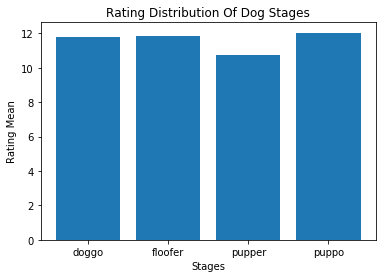

In [123]:
# Plot the distrution of rating mean of four stages in Bar chart
plt.bar(['doggo','floofer','pupper','puppo'],[doggo_mean,floofer_mean,pupper_mean,puppo_mean])
plt.title('Rating Distribution Of Dog Stages')
plt.xlabel('Stages')
plt.ylabel('Rating Mean')

## Analysis 2

### Rating Analysis:

Analysis of the rating: motivation for rating and does it effect the favorite count and retweet count.

In [124]:
# Determine the minimum and maximum value of numerator rating
archived_clean.rating_numerator.min(),archived_clean.rating_numerator.max()

(0, 1000)

In [125]:
archived_clean[archived_clean.rating_numerator==1000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
726,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/749981277...,1000,10,Atticus,NaN,NaN,NaN,NaN,2772,5569


In [126]:
archived_clean[archived_clean.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
235,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/835152434...,0,10,None,NaN,NaN,NaN,NaN,3443,24574
756,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/746906459...,0,10,None,NaN,NaN,NaN,NaN,336,3168


The maximum rating was originally higher than 1000, but it was cleaned and replaced to 1000 to  set a upper limit so that it does not remain as a outlier.<br>
The minimum rating is 0, given to 2 dogs with no name and no stage assigned. <br>
The denomiator value for the lowest and highest rating is 10, which is the expected standard of `WeRateDogs`. <br>
Both the rating types has good `retweet_count` and `favorite_count`.

In [127]:
# Determine the minimum and maximum value of rating_denominator
archived_clean.rating_denominator.min(),archived_clean.rating_denominator.max()

(2, 170)

In [128]:
archived_clean[archived_clean.rating_denominator==2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
1973,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666287406...,1,2,an,NaN,NaN,NaN,NaN,71,152


In [129]:
archived_clean[archived_clean.rating_denominator==170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
848,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/731156023...,204,170,this,NaN,NaN,NaN,NaN,1434,4196


The maximum denominator rating assigned is 170 .<br>
The minimum denominator rating given is 2.
The lowest and highest denominator rating are not close to the standard denominator rating of `WeRateDogs` twitter group, which is 10.<br>
Both the tweets with lowest and highest denominator rating, have no proper dog name and no dog stage assigned.<br>
Tweet with lowest denominator rating has low  `retweet_count` and `favorite_count`.

In [130]:
# check the tweet with highest retweet_count
archived_clean.retweet_count.max()

79515

In [131]:
# Determine the ratings of the tweet with highest retweet_count
archived_clean[archived_clean.retweet_count == 79515]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
775,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,NaN,NaN,NaN,79515,131075


In [132]:
# check the tweet with highest favorite_count
archived_clean.favorite_count.max()

132810

In [133]:
# Determine the ratings of the tweet with highest favorite_count
archived_clean[archived_clean.favorite_count == archived_clean.favorite_count.max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
309,822872901745569793,NaN,NaN,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/822872901...,13,10,None,NaN,NaN,NaN,puppo,48265,132810


Tweets with highest retweet_count and favorite_count have followed the standard rating values, and also have dog stage assigned i.e., `doggo` and `puppo`.

In [134]:
# Determine the `rating_numerator` mean 
archived_clean.rating_numerator.mean()

11.891675025075227

In [135]:
# Determine the `rating_denominator` mean 
archived_clean.rating_denominator.mean()

10.532096288866599

### Analysis 2 - Insights

In this dataset, the numerator rating ranges from 0 to 1000+ and denominator rating ranges from 2 to 170.
However, the overall `rating_denominator` mean is 10.5, which very close to the WeRateDogs twitter group standard, 10.
The `rating_numerator` mean is 11.9 which is greater than denominator mean, this follows the `Unique rating system` of `WeRateDogs`.

## Analysis 3

### Image - Prediction Algorithm Analysis

Analysis of the image prediction algorithm in predicting the dog type.

In [136]:
# Consider an example of tweet_id = 666020888022790149 and analyze the prediction match with archived data
archived_clean[archived_clean.tweet_id == 666020888022790149]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
1993,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN,NaN,NaN,NaN,532,2535


In [137]:
images_clean[images_clean.tweet_id == 666020888022790149]

,tweet_id,jpg_url,img_num,algorithm,breed,confidence,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
2075,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie,0.156665,True
4150,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p3,Shetland_sheepdog,0.061428,True


As per the archived data, the dog breed is similar to Welsh_springer_spaniel. <br>
This matches with the algorithm prediction of Welsh_springer_spaniel with highest confidence of 0.465074.

In [138]:
# Consider another example of tweet_id = 892420643555336193 and analyze the prediction match with archived data
archived_clean[archived_clean.tweet_id == 892420643555336193]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,8853,39467


In [139]:
images_clean[images_clean.tweet_id == 892420643555336193]

,tweet_id,jpg_url,img_num,algorithm,breed,confidence,prediction
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,p1,orange,0.097049,False
4149,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,p2,bagel,0.085851,False
6224,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,p3,banana,0.076110,False


As per the archived data, the dog breed in tweet: 892420643555336193 is not clear since the picture taken through the bagel does not show the dog fully.
This matches with the algorithm prediction which says dog predicted as False .

In [140]:
# True and False count in the 'prediction' column`
images_clean.prediction.value_counts()

True     4584
False    1641
Name: prediction, dtype: int64

In [141]:
predict_count = sum(images_clean.prediction == 'True')
predict_count

4584

In [142]:
unpredict_count = sum(images_clean.prediction == 'False')
unpredict_count

1641

### Analysis 3 - Insights

Based on the analysis of prediction algorithm, it is seen that algorithm is able to predict the main object/animal of the picture: `breed` uploaded in the tweet and then based on the object/animal prediction, it predicts if a dog is predicted or not.

In this dataset, out of 7225 images, the algorithm has predicted 4585 dog breeds and failed to predict in 1641 cases.<br>
This algorithm is able to identify the dog in the picture in many instances. However when the dog is in the background or when is being partially seen or when placed in the side of the picture instead of being placed at the center of the picture, then the algorithm is not able to identify the dog and instead identifies the other objects in the picture.

#### Plot the distribution of the `prediction` values in the images_clean table

Text(0,0.5,'Count')

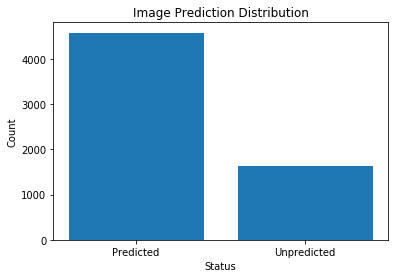

In [143]:
# Plot 'prediction' distribution in bar chart
plt.bar(['Predicted','Unpredicted'],[predict_count,unpredict_count])
plt.title('Image Prediction Distribution')
plt.xlabel('Status')
plt.ylabel('Count')